# LOAN PREDICTION SYSTEM USING MACHINE LEARNING

### Group members :
## 45 - SAMPADA MAHADIK
## 21 - OM CHAVAN
## 40 - PARTHAVI KHATU

## Directory chosen & reading train dataset 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("./Datasets/train.csv")
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [5]:
df.tail()

Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## No. of NULL Values

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.describe() 

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Data Pre-Processing

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
# handle numerical missing data
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# handle categorical missing data
df['Gender'].mode()[0]

'Male'

In [16]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

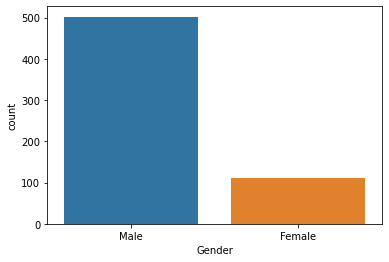

In [18]:
import seaborn as sns
sns.countplot(df['Gender'])

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

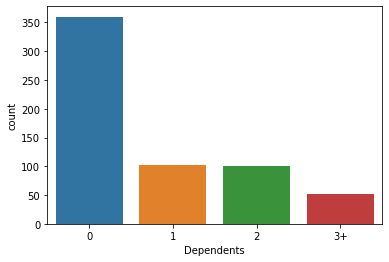

In [19]:
sns.countplot(df.Dependents)

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

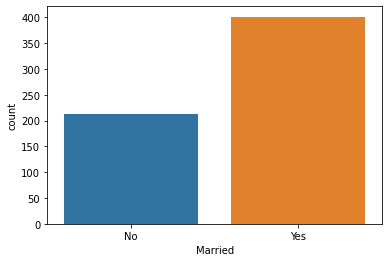

In [20]:
sns.countplot(df.Married)

## Numerical Data

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

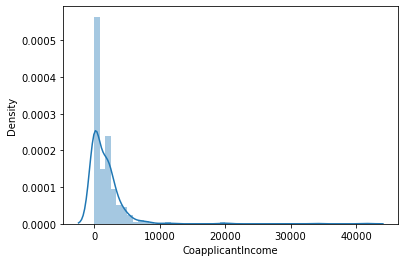

In [21]:
sns.distplot(df.CoapplicantIncome)

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

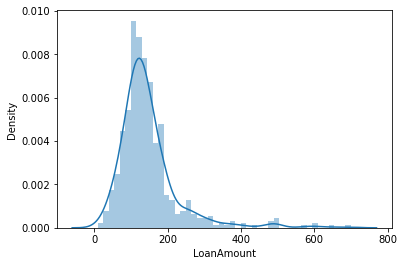

In [22]:
sns.distplot(df.LoanAmount)

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

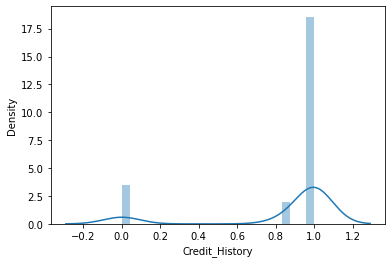

In [23]:
sns.distplot(df.Credit_History)

In [24]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [25]:
# New Column
df['Total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

In [26]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  Total_income  
0             1.0         Urban           Y        5849.0  
1             1.0         Rural           N        6091.0  
2             1.0         Urban           Y        3000.0  
3             1.0         Urban           Y        4941.0  
4             1.0         Urban           Y        6000.0

## Data Transformation

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

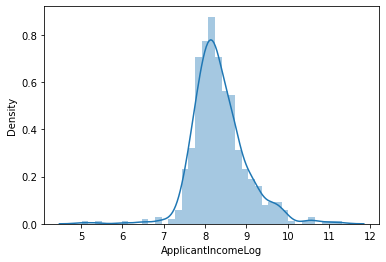

In [27]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df.ApplicantIncomeLog)

C:\Users\Shruti\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

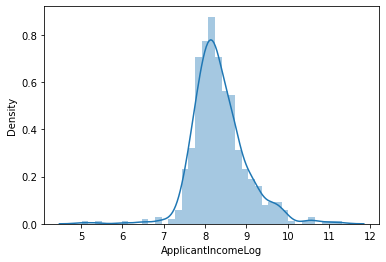

In [28]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.distplot(df["ApplicantIncomeLog"])

In [ ]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmountLog"])

In [ ]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term_Log"])

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

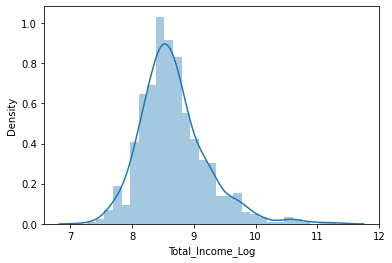

In [31]:
df['Total_Income_Log'] = np.log(df['Total_income'])
sns.distplot(df["Total_Income_Log"])

In [32]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  Total_income  ApplicantIncomeLog  \
0             1.0         Urban           Y        5849.0            8.674026   
1             1.0         Rural           N        6091.0            8.430109   
2             1.0         Urban           Y        3000.0            8.006368   
3             1.0         Urban           Y        4941.0            7.856707   
4             1.0         Urban           Y        6000.0            8.699515   

   CoapplicantIncomeLog  LoanAmountLog  Loan_Amount_Term_Log  Total_Income_Log  
0                  -inf       4.986426              5.886104          8.674026  
1              7.318540       4.852030              5.886104          8.714568  
2                  -inf       4.189655              5.886104          8.006368  
3              7.765569       4.787492              5.886104          8.505323  
4                  -inf       4.948760              5.886104          8.699515

In [33]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)

In [34]:
df.head()

Gender Married Dependents     Education Self_Employed  Credit_History  \
0   Male      No          0      Graduate            No             1.0   
1   Male     Yes          1      Graduate            No             1.0   
2   Male     Yes          0      Graduate           Yes             1.0   
3   Male     Yes          0  Not Graduate            No             1.0   
4   Male      No          0      Graduate            No             1.0   

  Property_Area Loan_Status  ApplicantIncomeLog  LoanAmountLog  \
0         Urban           Y            8.674026       4.986426   
1         Rural           N            8.430109       4.852030   
2         Urban           Y            8.006368       4.189655   
3         Urban           Y            7.856707       4.787492   
4         Urban           Y            8.699515       4.948760   

   Loan_Amount_Term_Log  Total_Income_Log  
0              5.886104          8.674026  
1              5.886104          8.714568  
2              5.886104          8.006368  
3              5.886104          8.505323  
4              5.886104          8.699515

In [35]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [36]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

## Handling Categorical Data

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    object 
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    object 
 7   Loan_Status           614 non-null    object 
 8   ApplicantIncomeLog    614 non-null    float64
 9   LoanAmountLog         614 non-null    float64
 10  Loan_Amount_Term_Log  614 non-null    float64
 11  Total_Income_Log      614 non-null    float64
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [38]:
cols = ['Gender',"Married","Dependents","Education",'Self_Employed',"Property_Area"]
for col in cols:
    df[col] = pd.get_dummies(df[col], drop_first= True)

In [39]:
df.head()

Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area Loan_Status  ApplicantIncomeLog  LoanAmountLog  \
0              0           Y            8.674026       4.986426   
1              0           N            8.430109       4.852030   
2              0           Y            8.006368       4.189655   
3              0           Y            7.856707       4.787492   
4              0           Y            8.699515       4.948760   

   Loan_Amount_Term_Log  Total_Income_Log  
0              5.886104          8.674026  
1              5.886104          8.714568  
2              5.886104          8.006368  
3              5.886104          8.505323  
4              5.886104          8.699515

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    uint8  
 1   Married               614 non-null    uint8  
 2   Dependents            614 non-null    uint8  
 3   Education             614 non-null    uint8  
 4   Self_Employed         614 non-null    uint8  
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    uint8  
 7   Loan_Status           614 non-null    object 
 8   ApplicantIncomeLog    614 non-null    float64
 9   LoanAmountLog         614 non-null    float64
 10  Loan_Amount_Term_Log  614 non-null    float64
 11  Total_Income_Log      614 non-null    float64
dtypes: float64(5), object(1), uint8(6)
memory usage: 32.5+ KB


In [41]:
df.describe()

Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000     614.000000   
mean     0.817590    0.653094    0.166124    0.218241       0.133550   
std      0.386497    0.476373    0.372495    0.413389       0.340446   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    0.000000    0.000000       0.000000   
max      1.000000    1.000000    1.000000    1.000000       1.000000   

       Credit_History  Property_Area  ApplicantIncomeLog  LoanAmountLog  \
count      614.000000     614.000000          614.000000     614.000000   
mean         0.842199       0.379479            8.341213       4.862066   
std          0.349681       0.485653            0.645263       0.496575   
min          0.000000       0.000000            5.010635       2.197225   
25%          1.000000       0.000000            7.964677       4.607658   
50%          1.000000       0.000000            8.246040       4.859812   
75%          1.000000       1.000000            8.664750       5.104426   
max          1.000000       1.000000           11.302204       6.551080   

       Loan_Amount_Term_Log  Total_Income_Log  
count            614.000000        614.000000  
mean               5.802065          8.669414  
std                0.312482          0.545102  
min                2.484907          7.273786  
25%                5.886104          8.334712  
50%                5.886104          8.597205  
75%                5.886104          8.925549  
max                6.173786         11.302204

## Test Dataset

In [42]:
test = pd.read_csv("./Datasets/test.csv")
# filling numerical missing data
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mean())

# filling categorical missing data
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

test['Total_income'] = test['ApplicantIncome']+test['CoapplicantIncome']

# apply log transformation to the attribute
test['ApplicantIncomeLog'] = np.log(test['ApplicantIncome'])

test['CoapplicantIncomeLog'] = np.log(test['CoapplicantIncome'])

test['LoanAmountLog'] = np.log(test['LoanAmount'])

test['Loan_Amount_Term_Log'] = np.log(test['Loan_Amount_Term'])

test['Total_Income_Log'] = np.log(test['Total_income'])

cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomeLog']
test = test.drop(columns=cols, axis=1)



C:\Users\Shruti\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [43]:
cols = ['Gender',"Married","Dependents","Education",'Self_Employed',"Property_Area"]
for col in cols:
    test[col] = pd.get_dummies(test[col], drop_first= True)

In [44]:
test.head()

Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        1           0          0              0        1.000000   
1       1        1           1          0              0        1.000000   
2       1        1           0          0              0        1.000000   
3       1        1           0          0              0        0.825444   
4       1        0           0          1              0        1.000000   

   Property_Area  ApplicantIncomeLog  LoanAmountLog  Loan_Amount_Term_Log  \
0              0            8.651724       4.700480              5.886104   
1              0            8.031385       4.836282              5.886104   
2              0            8.517193       5.337538              5.886104   
3              0            7.757906       4.605170              5.886104   
4              0            8.094378       4.356709              5.886104   

   Total_Income_Log  
0          8.651724  
1          8.428581  
2          8.824678  
3          8.494129  
4          8.094378

## Split Datasets

In [45]:
df.head()

Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area Loan_Status  ApplicantIncomeLog  LoanAmountLog  \
0              0           Y            8.674026       4.986426   
1              0           N            8.430109       4.852030   
2              0           Y            8.006368       4.189655   
3              0           Y            7.856707       4.787492   
4              0           Y            8.699515       4.948760   

   Loan_Amount_Term_Log  Total_Income_Log  
0              5.886104          8.674026  
1              5.886104          8.714568  
2              5.886104          8.006368  
3              5.886104          8.505323  
4              5.886104          8.699515

In [46]:
# specify input and output attributes
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [47]:
x

Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0         1        0           0          0              0             1.0   
1         1        1           1          0              0             1.0   
2         1        1           0          0              1             1.0   
3         1        1           0          1              0             1.0   
4         1        0           0          0              0             1.0   
..      ...      ...         ...        ...            ...             ...   
609       0        0           0          0              0             1.0   
610       1        1           0          0              0             1.0   
611       1        1           1          0              0             1.0   
612       1        1           0          0              0             1.0   
613       0        0           0          0              1             0.0   

     Property_Area  ApplicantIncomeLog  LoanAmountLog  Loan_Amount_Term_Log  \
0                0            8.674026       4.986426              5.886104   
1                0            8.430109       4.852030              5.886104   
2                0            8.006368       4.189655              5.886104   
3                0            7.856707       4.787492              5.886104   
4                0            8.699515       4.948760              5.886104   
..             ...                 ...            ...                   ...   
609              0            7.972466       4.262680              5.886104   
610              0            8.320205       3.688879              5.192957   
611              0            8.996157       5.533389              5.886104   
612              0            8.933664       5.231109              5.886104   
613              1            8.430109       4.890349              5.886104   

     Total_Income_Log  
0            8.674026  
1            8.714568  
2            8.006368  
3            8.505323  
4            8.699515  
..                ...  
609          7.972466  
610          8.320205  
611          9.025456  
612          8.933664  
613          8.430109  

[614 rows x 11 columns]

In [48]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
x_train.head()

Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
83        1        1           0          0              0        0.842199   
90        1        1           0          0              0        1.000000   
227       1        1           0          0              0        1.000000   
482       1        1           0          0              0        1.000000   
464       1        0           0          0              0        0.000000   

     Property_Area  ApplicantIncomeLog  LoanAmountLog  Loan_Amount_Term_Log  \
83               1            8.699515       5.579730              5.886104   
90               1            7.992269       4.875197              5.886104   
227              1            8.740337       5.347108              5.886104   
482              1            7.641564       4.852030              5.886104   
464              1            8.334712       4.584967              5.886104   

     Total_Income_Log  
83           9.017968  
90           8.675564  
227          8.980298  
482          8.562740  
464          8.334712

In [51]:
y_test.head()

350    Y
377    Y
163    Y
609    Y
132    Y
Name: Loan_Status, dtype: object

## GAUSSIAN NAIVE BAYES ALGORITHM

In [52]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(x_train, y_train)
print("Accuracy is", model.score(x_test, y_test)*100)


Accuracy is 78.04878048780488


In [61]:
pred= model.predict(x_test)

In [64]:
pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N'], dtype='<U1')

In [67]:
ModelGB=(pred=='Y').astype(int)

In [68]:
ModelGB

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

## SUPPORT VECTOR MACHINE ALGORITHM

In [53]:
from sklearn.svm import SVC
model1 = SVC()

model1.fit(x_train, y_train)
print("Accuracy is", model1.score(x_test, y_test)*100)

Accuracy is 65.04065040650406


## K NEAREST NEIGHBOUR ALGORITHM

In [54]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()

model2.fit(x_train, y_train)
print("Accuracy is", model2.score(x_test, y_test)*100)

Accuracy is 75.60975609756098


## HIGHEST ACCURACY is given by Gaussian NB = 77.27%

In [55]:
#Gaussian NB
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm


array([[18, 25],
       [ 2, 78]], dtype=int64)

In [71]:
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [72]:
print("Accuracy is", classifier.score(x_test, y_test)*100)

Accuracy is 78.04878048780488


## MODEL

In [70]:

import pickle
file=open("model.pkl", 'wb')
pickle.dump(ModelGB, file)

In [73]:
import pickle
pickle.dump(classifier,open("review.pkl","wb"))